In [4]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [20]:
# Load the dataset
df = pd.read_csv('bank.csv')

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [24]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [106]:
# Apply necessary processing on it
# Encode categorical features using label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        labelencoder = LabelEncoder()
        df[col] = labelencoder.fit_transform(df[col])

In [116]:
df["default"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4516    0.0
4517    1.0
4518    0.0
4519    0.0
4520    0.0
Name: default, Length: 4521, dtype: float64

In [117]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


In [107]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
# Split the dataset into training and testing sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
X_train.shape,y_train.shape

((3164, 16), (3164,))

In [112]:
X_test.shape,y_test.shape

((1357, 16), (1357,))

In [109]:
# Build a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [96]:
y_pred_dt

array([0., 1., 0., ..., 0., 0., 0.])

In [97]:
# Evaluate the performance of the decision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

In [98]:
print(accuracy_dt)
print(precision_dt)
print(recall_dt)
print(f1_score_dt)

0.8614591009579956
0.38311688311688313
0.3881578947368421
0.3856209150326797


In [99]:
# Build a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [100]:
y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
# Evaluate the performance of the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
#printing the values
print("accuarcy score :",accuracy_rf)
print("precision score:",precision_rf)
print("recall :",recall_rf)
print("f1_score :",f1_score_rf)

accuarcy score : 0.9005158437730287
precision score: 0.6164383561643836
recall : 0.29605263157894735
f1_score : 0.39999999999999997


In [102]:
# Build an XGBoost classifier
xgb_clf =XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

In [103]:
# Evaluate the performance of the XGBoost classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)#printing the values
print("accuarcy score :",accuracy_xgb)
print("precision score:",precision_xgb)
print("recall :",recall_xgb)
print("f1_score :",f1_score_xgb)

accuarcy score : 0.8960943257184967
precision score: 0.5495495495495496
recall : 0.40131578947368424
f1_score : 0.46387832699619774


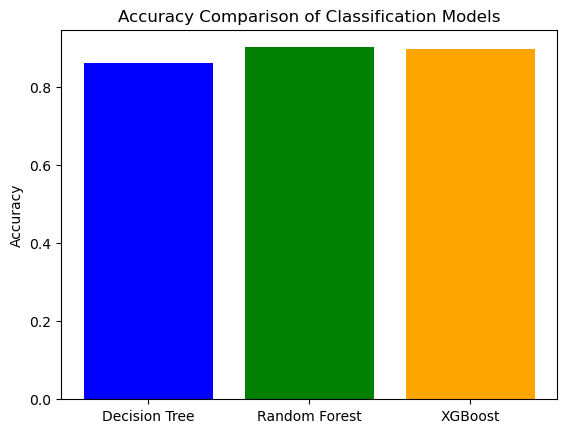

In [104]:
# Data for plotting
labels = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy_dt, accuracy_rf, accuracy_xgb]

# Plotting
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.show()